# seaborn 및 앤스콤 데이터 불러오기

In [1]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
type(anscombe)

pandas.core.frame.DataFrame

# 그래프 축이름 및 제목 글씨 색상 화이트로 바꾸기

In [2]:
{k: v for k, v in sns.axes_style().items() if "color" in k}

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False}

In [3]:
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white',
                'text.color': 'white'}
sns.set_style("dark", rc=custom_style)

set_style에는 darkgrid, whitegrid, dark, white, ticks 5종류가 있다.

# 그래프 그리기 시작

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']

In [5]:
plt.style.use("dark_background") #<- 이거 쓰면 각 그래프의 배경이 검은색이 되고 흰색 격자가 생긴다

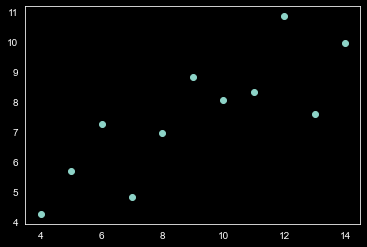

In [6]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')
plt.show()

In [7]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

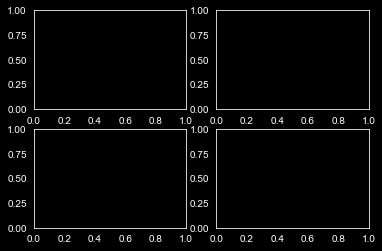

In [8]:
#그래프가 위치할 기본 틀 만들기
fig = plt.figure()

#기본 틀에 격자 추가
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

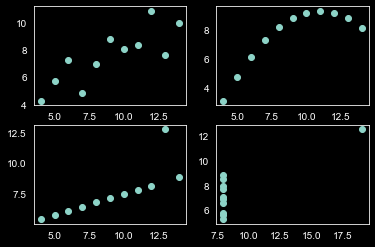

In [9]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

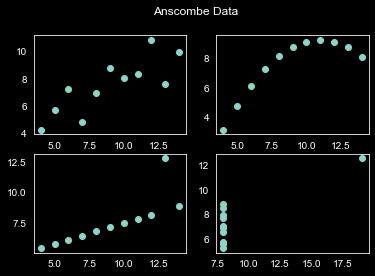

In [10]:
fig.suptitle("Anscombe Data")
fig

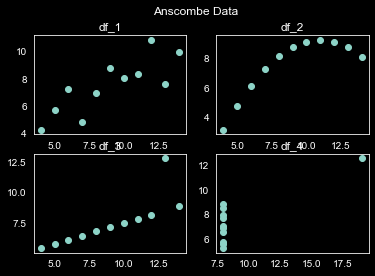

In [11]:
axes1.set_title('df_1')
axes2.set_title('df_2')
axes3.set_title('df_3')
axes4.set_title('df_4')
fig

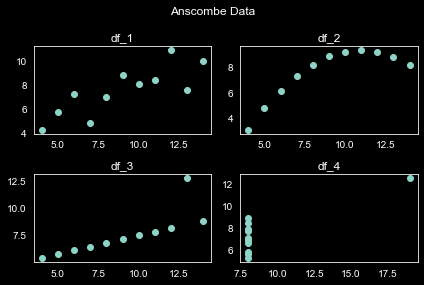

In [12]:
fig.tight_layout()
fig

In [13]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


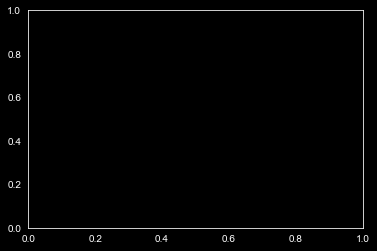

In [14]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

## 히스토그램(일변량 그래프) 그리기

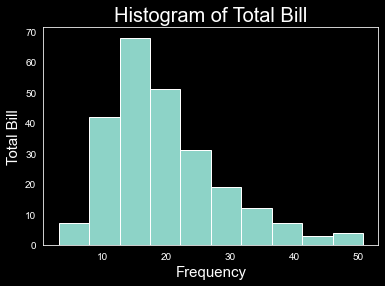

In [15]:
axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill', fontsize = 20)
axes1.set_xlabel('Frequency', fontsize = 15)
axes1.set_ylabel('Total Bill', fontsize = 15)
fig

## 산점도(이변량) 그리기

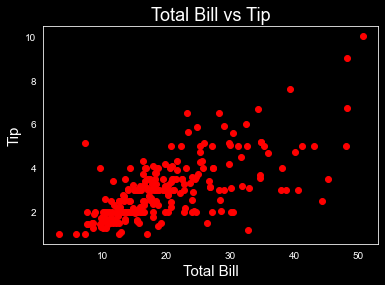

In [16]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'], color = 'r')
axes1.set_title('Total Bill vs Tip', fontsize = 18)
axes1.set_xlabel('Total Bill', fontsize = 15)
axes1.set_ylabel('Tip', fontsize = 15)
plt.show()

## 박스 그래프 그리기

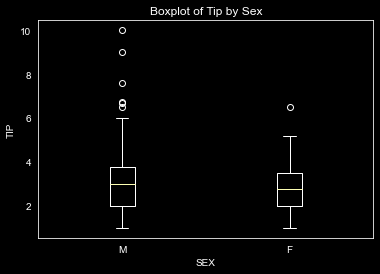

In [17]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']== 'Male']['tip'], tips[tips['sex']=='Female']['tip']], labels = ['M', 'F'])
axes1.set_xlabel('SEX')
axes1.set_ylabel('TIP')
axes1.set_title('Boxplot of Tip by Sex')
plt.show()

In [18]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1    

In [19]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


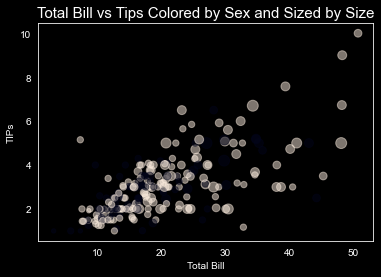

In [20]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.scatter(x = tips['total_bill'],
              y = tips['tip'],
              s = tips['size']*20,
              c = tips['sex_color'],
              alpha = 0.5)
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('TIPs')
axes1.set_title('Total Bill vs Tips Colored by Sex and Sized by Size', fontsize = 15)
plt.show()

# Seaborn 라이브러리 자유자재로 활용하기

Seaborn 라이브러리는 Matplotlib를 기반으로 만든 라이브러리

In [21]:
import seaborn as sns
tips = sns.load_dataset('tips')

C:\Users\SGI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


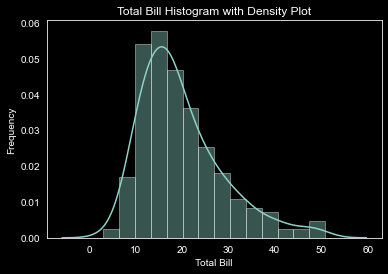

In [22]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')
plt.show()

## 빈도수만 나타내고 밀집도 그래프는 제거

C:\Users\SGI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


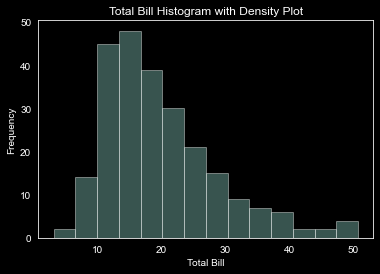

In [23]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')
plt.show()

## 밀집도 그래프만 나타내기

C:\Users\SGI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


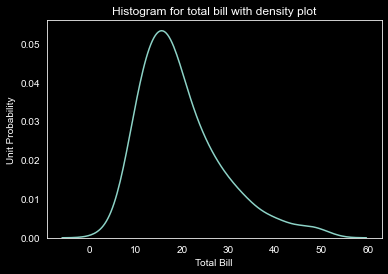

In [24]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Histogram for total bill with density plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')
plt.show()

밀집도 그래프는 주어진 그래프를 정규화시켜 넓이가 1이 되도록 그린 그래프

C:\Users\SGI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SGI\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


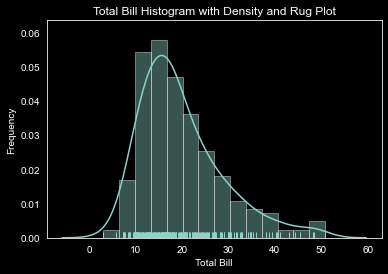

In [25]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')
plt.show()

양탄자 그래프는 데이터의 축에 동일한 길이의 직선을 붙여 데이터의 밀집도를 나타낸 그래프

## 이산값을 나타내는 Countplot 그리기

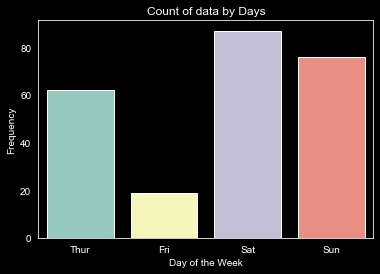

In [26]:
ax = plt.subplots()
ax = sns.countplot(x = 'day', data = tips)
ax.set_title('Count of data by Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

## 산점도 그리기

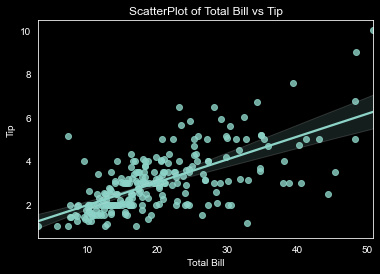

In [27]:
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill',y = 'tip', data = tips)
ax.set_title('ScatterPlot of Total Bill vs Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

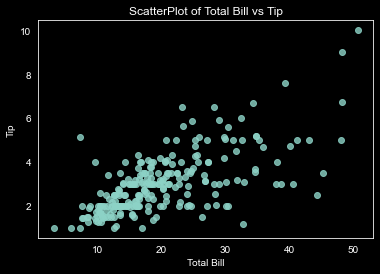

In [28]:
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False)
ax.set_title('ScatterPlot of Total Bill vs Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

## 산점도와 히스토그램을 한꺼번에 그려주는 jointplot 그리기

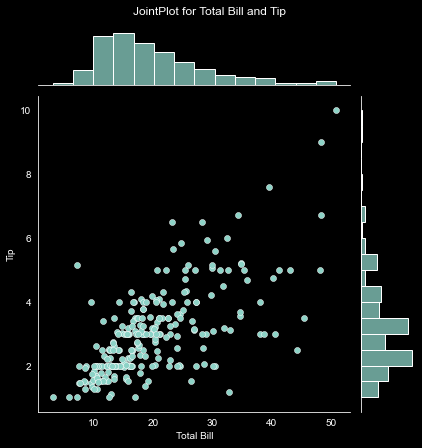

In [29]:
ax = sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
ax.fig.suptitle('JointPlot for Total Bill and Tip', y = 1.03)
ax.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
plt.show()

## kind변수에 'hex'추가하여 JointPlot의 점이 겹쳐 보일 경우 점이 구분되기 어렵다는 단점 극복

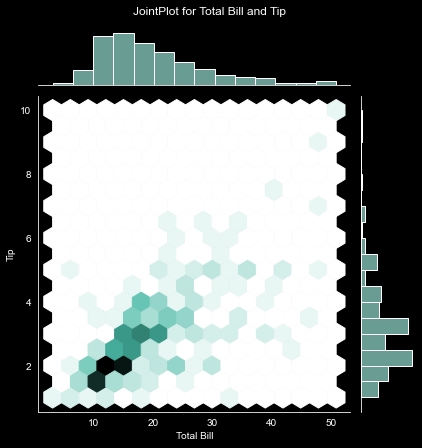

In [30]:
ax = sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')
ax.fig.suptitle('JointPlot for Total Bill and Tip', y = 1.03)
ax.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
plt.show()

## 바 그래프 그리기

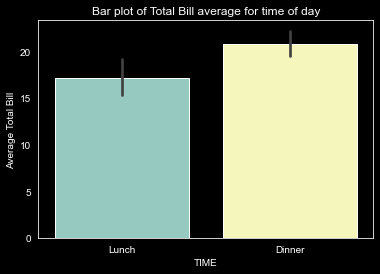

In [31]:
ax = plt.subplots()
ax = sns.barplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Bar plot of Total Bill average for time of day')
ax.set_xlabel('TIME')
ax.set_ylabel('Average Total Bill')
plt.show()

바 그래프는 지정한 변수의 평균을 계산하여 표시할 수 있다.

## 박스 그래프 그리기

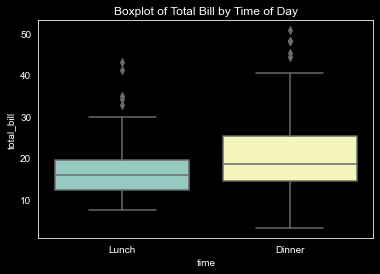

In [32]:
ax = plt.subplots()
ax = sns.boxplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Boxplot of Total Bill by Time of Day')
plt.show()

박스 그래프는 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치등 다양한 값을 한 번에 나타낼 수 있음

## 바이올린 플롯

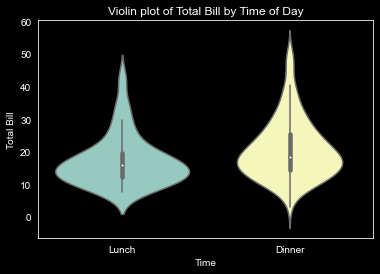

In [33]:
ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Violin plot of Total Bill by Time of Day')
ax.set_xlabel('Time')
ax.set_ylabel('Total Bill')
plt.show()

바이올린 플롯을 사용해 그래프의 분산이 모호하게 표현된다는 박스 플롯의 단점을 보완할 수 있음

## 산점도 그래프: 색상과 점 크기와 종류 조정

### sns.scatterplot으로 본래 점 사이즈 고려하여 크기 조정

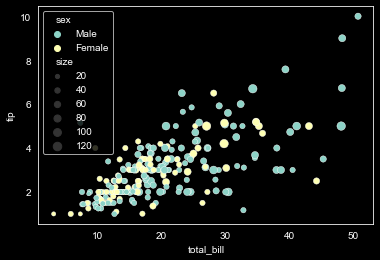

In [57]:
ax = sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', size = tips['size']*20)

### sns.lmplot

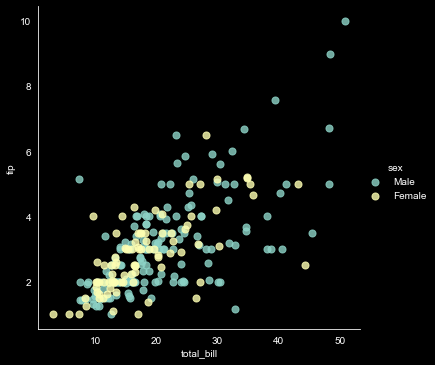

In [59]:
ax = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue = 'sex', scatter_kws = {'s' : 50})

scatter_kws에 사이즈 변수 입력하여 점 사이즈 조절 가능하긴 함

sns.lmplot 사용하면 fit_reg옵션(regression line의 유무 지정) 사용할 수 있지만 사이즈를 고려하여 점의 크기를 조절할 수 없다.

### 산점도 그래프의 점을 카테고리에 따라 서로 다른 종류의 점으로 나타내기

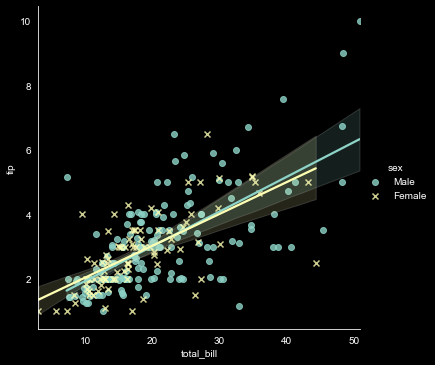

In [61]:
ax = sns.lmplot(x= 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'x'])

원하는 표시 기호들을 리스트로 묶어 전달해야 함

## 그룹별로 앤스콤 그래프 나누어 그리기

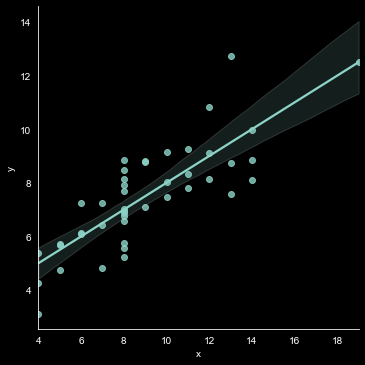

In [63]:
anscombe_plot = sns.lmplot(x = 'x', y = 'y', data = anscombe, fit_reg = True)

산점도 그리는 매서드는 크게 4가지가 있다.
1. fig.add_subplot(1,1,1).scatter()
2. sns.scatterplot()
3. sns.regplot() #reg : regression
4. sns.lmplot()  #lm : linear model

### 앤스콤 그래프 구분 1: lmplot매서드에 추가로 col와 col_wrap 인자 설정하기

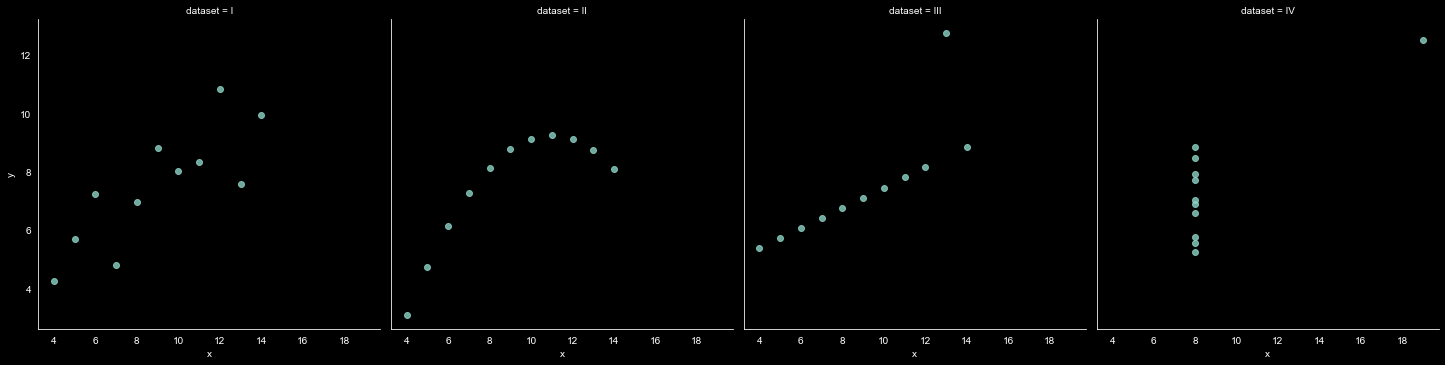

In [68]:
anscombe_plot = sns.lmplot(x = 'x', y = 'y', data = anscombe, fit_reg = False,
                           col = 'dataset', 
                           col_wrap = 4)

### 앤스콤 그래프 구분 2: FacetGrid매서드 이용하기

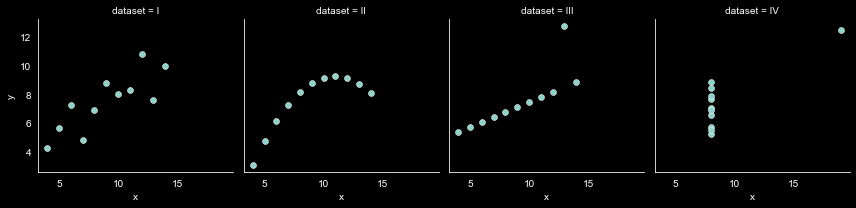

In [72]:
anscombe_plot = sns.FacetGrid(data = anscombe, col = 'dataset')
anscombe_plot.map(sns.scatterplot, 'x', 'y')
plt.show()

#### FacetGrid 응용: 4개 변수 이용하기

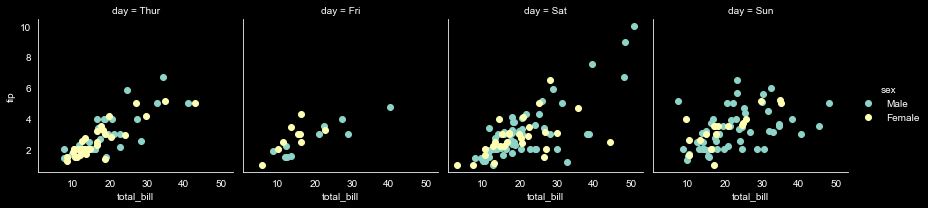

In [74]:
facet = sns.FacetGrid(tips, col = 'day', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

#### FacetGrid 응용: 5개 변수 이용하기

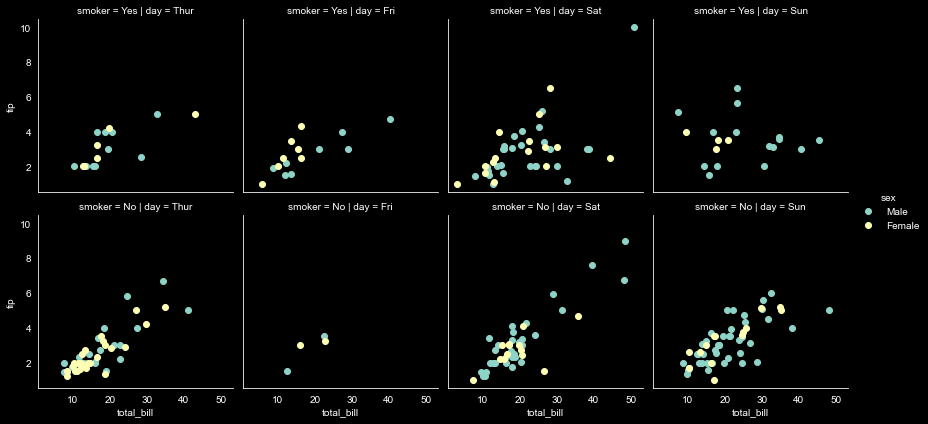

In [77]:
facet = sns.FacetGrid(tips, col = 'day', row = 'smoker', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

# 데이터 프레임과 시리즈로 그래프 그리기

## Series.plot 또는 DataFrame.plot 속성 이용해 다양한 그래프 시리즈로부터 곧바로 그리기!

### 시리즈.plot.hist() 이용해 시리즈로부터 histogram 곧바로 그리기

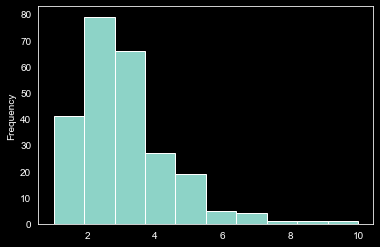

In [78]:
ax = plt.subplots()
ax = tips['tip'].plot.hist()

시리즈에 있는 plot속성에 정의되어 있는 hist매서드를 사용하면 해당 시리즈의 값을 이용해 그래프를 곧바로 그릴수 있음!

### 시리즈의 plot 속성의 .kde()매서드 이용해보기

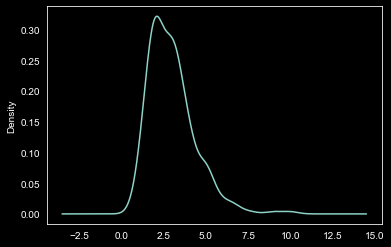

In [83]:
fig, ax = plt.subplots()
ax = tips['tip'].plot.kde()

### DF.plot.hexbin()

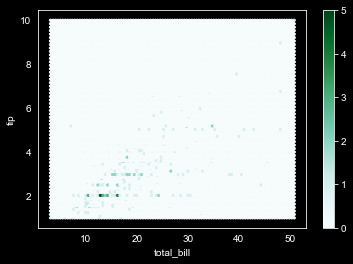

In [86]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', ax = ax)

#### 위 Hexbin그래프의 육각형 크기 변경

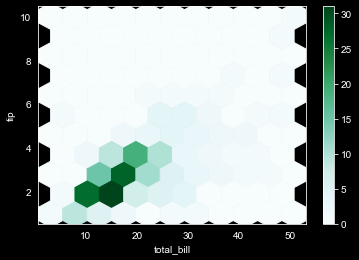

In [88]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', gridsize = 10, ax = ax)

### DF.plot.scatter()

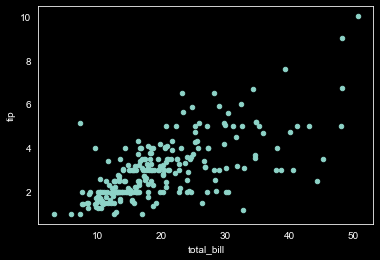

In [87]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x = 'total_bill', y = 'tip', ax = ax)

### hist매서드의 alpha, bins, ax 인자를 이용하여 그래프의 투명도 조절

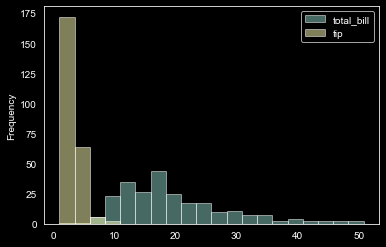

In [81]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(ax = ax, bins = 20, alpha = 0.5)

plt.subplots()는 (fig, ax) 튜플을 반환함.\
'fig, ax ='는 튜플의 두 요소를 각각의 변수로 받는것.\
fig는 figure 전체 수준의 수정을 하거나 나중에 figure을 파일로 저장할 때 쓰일 수 있음.

'fig, ax = plt.subplots()'는 결국\
'fig = plt.figure()\
 ax = fig.add_subplot(1,1,1)'\
 과 정확히 동일한 기능을 하지만 더 간결한 버전임!

bins는 x축 표시단위, alpha는 투명도

### box 매서드를 사용하여 그린 박스 플롯

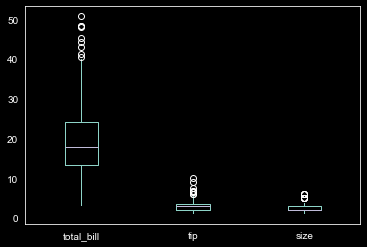

In [90]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax = ax)

# Seaborn라이브러리로 그래프 스타일 설정하기

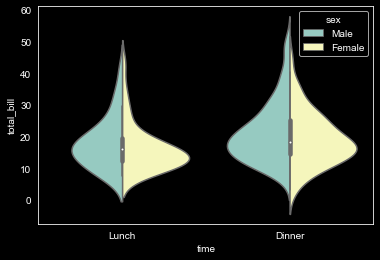

In [91]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

## whitegrid스타일 적용해보기

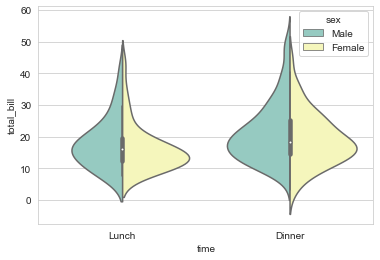

In [92]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

## for문을 이용하여 모든 스타일을 하나씩 적용한 그래프

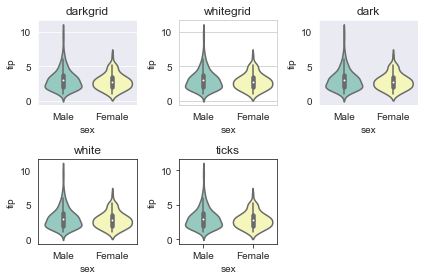

In [93]:
fig = plt.figure()
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2,3,plot_position)
        violin = sns.violinplot(x = 'sex', y = 'tip', data = tips, ax = ax)
        violin.set_title(style)
    plt.tight_layout()
        
    